## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [167]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

import json
import os
# I have create a new folder call "PUI2016" and put in the fbb_matplotlibrc json file
s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
#s = json.load( open("https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/fbb_matplotlibrc.json") )?
pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['isreal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


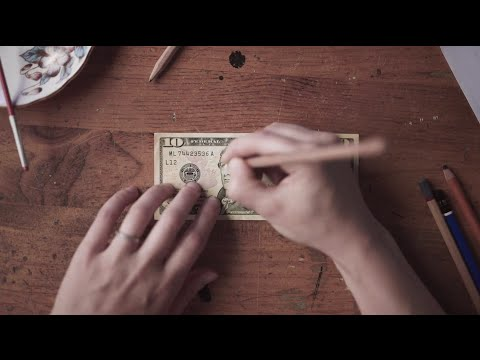

In [168]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 

In [169]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [170]:
allmales = {}
allfemales = {}
#use header row to parse the column labels
data2_1 = pd.read_excel(url + "pinc08_2_1_1.xls", header = 9)
data2_4 = pd.read_excel(url + "pinc08_2_1_4.xls", header = 9)
data2_6 = pd.read_excel(url + "pinc08_2_1_6.xls", header = 9)
data2_8 = pd.read_excel(url + "pinc08_2_1_8.xls", header = 9)
data2_9 = pd.read_excel(url + "pinc08_2_1_9.xls", header = 9)
data3_1 = pd.read_excel(url + "pinc08_3_1_1.xls", header = 9)
data3_4 = pd.read_excel(url + "pinc08_3_1_4.xls", header = 9)
data3_6 = pd.read_excel(url + "pinc08_3_1_6.xls", header = 9)
data3_8 = pd.read_excel(url + "pinc08_3_1_8.xls", header = 9)
data3_9 = pd.read_excel(url + "pinc08_3_1_9.xls", header = 9)

allmales = {"all":data2_1,
            "white":data2_4,
            "black":data2_6,
            "asian":data2_8,
            "hispanic":data2_9,
           }

allfemales = {"all":data3_1,
            "white":data3_4,
            "black":data3_6,
            "asian":data3_8,
            "hispanic":data3_9,
           }

In [171]:
#allfemales and allmales should be dictionaries
type(allfemales)

dict

In [172]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [173]:
# the files are a bit of a mess! 
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

# Descriptive phase: 


In [174]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### all
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        17383.000000           2971.826087       1010.608696   
std         28945.070201           7604.959824       1190.210877   
min            84.000000              0.000000          6.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max        109956.000000          38367.000000       4298.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean        1148.869565       1470.391304         1469.478261   
std         1569.333455       2365.722680         2502.601125   
min            0.000000          2.000000            0.000000   
25%                 NaN               NaN           

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

# 2. Exploratory phase

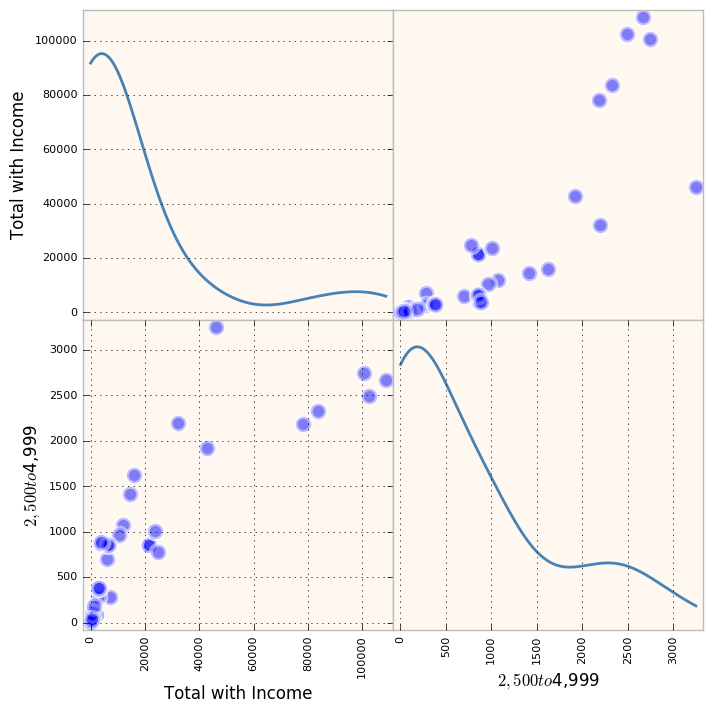

In [175]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(8,8), 
                        diagonal='kde')                

###  Figure 1: Scatter matrix. Each numerical dataframe column is plotted against each other. Only the 'Total with Income' and ' 2500 to 4999' are ploted because they only columns containing real numerical values

In [176]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [177]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


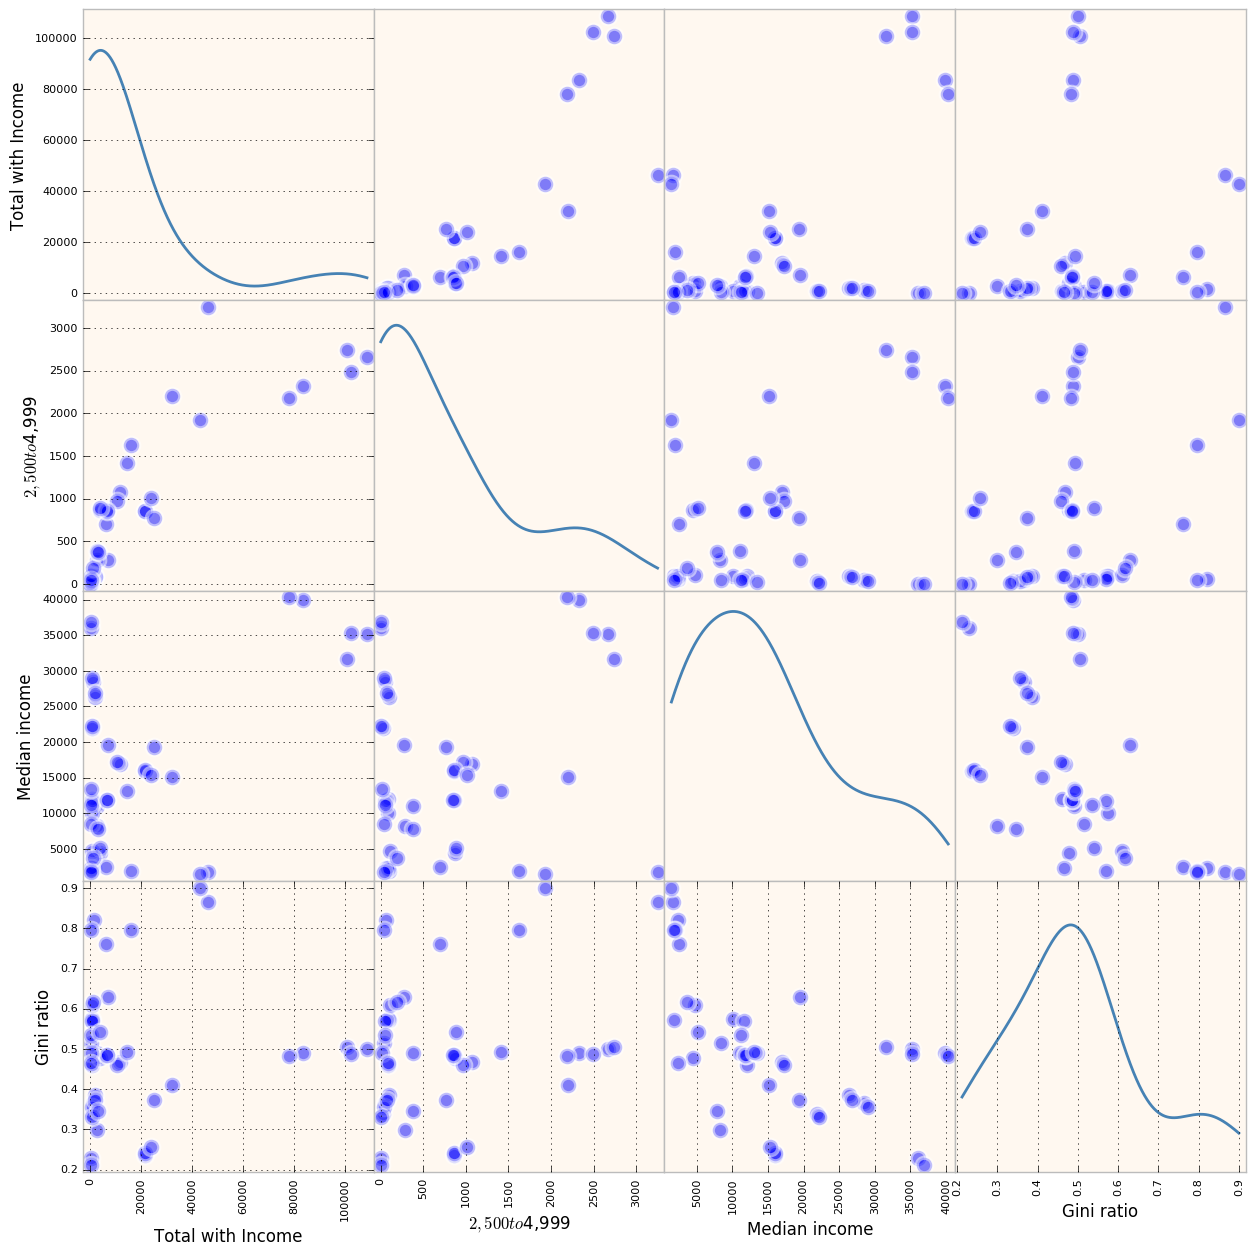

In [178]:
# use scatter_matrix to make a scatter plot for allmales
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 
# diagonal: density plot

### Figure 2: Scatter matrix. Each numerical dataframe column is plotted against each other.  After the cleaning, all four columns of data can be plotted.

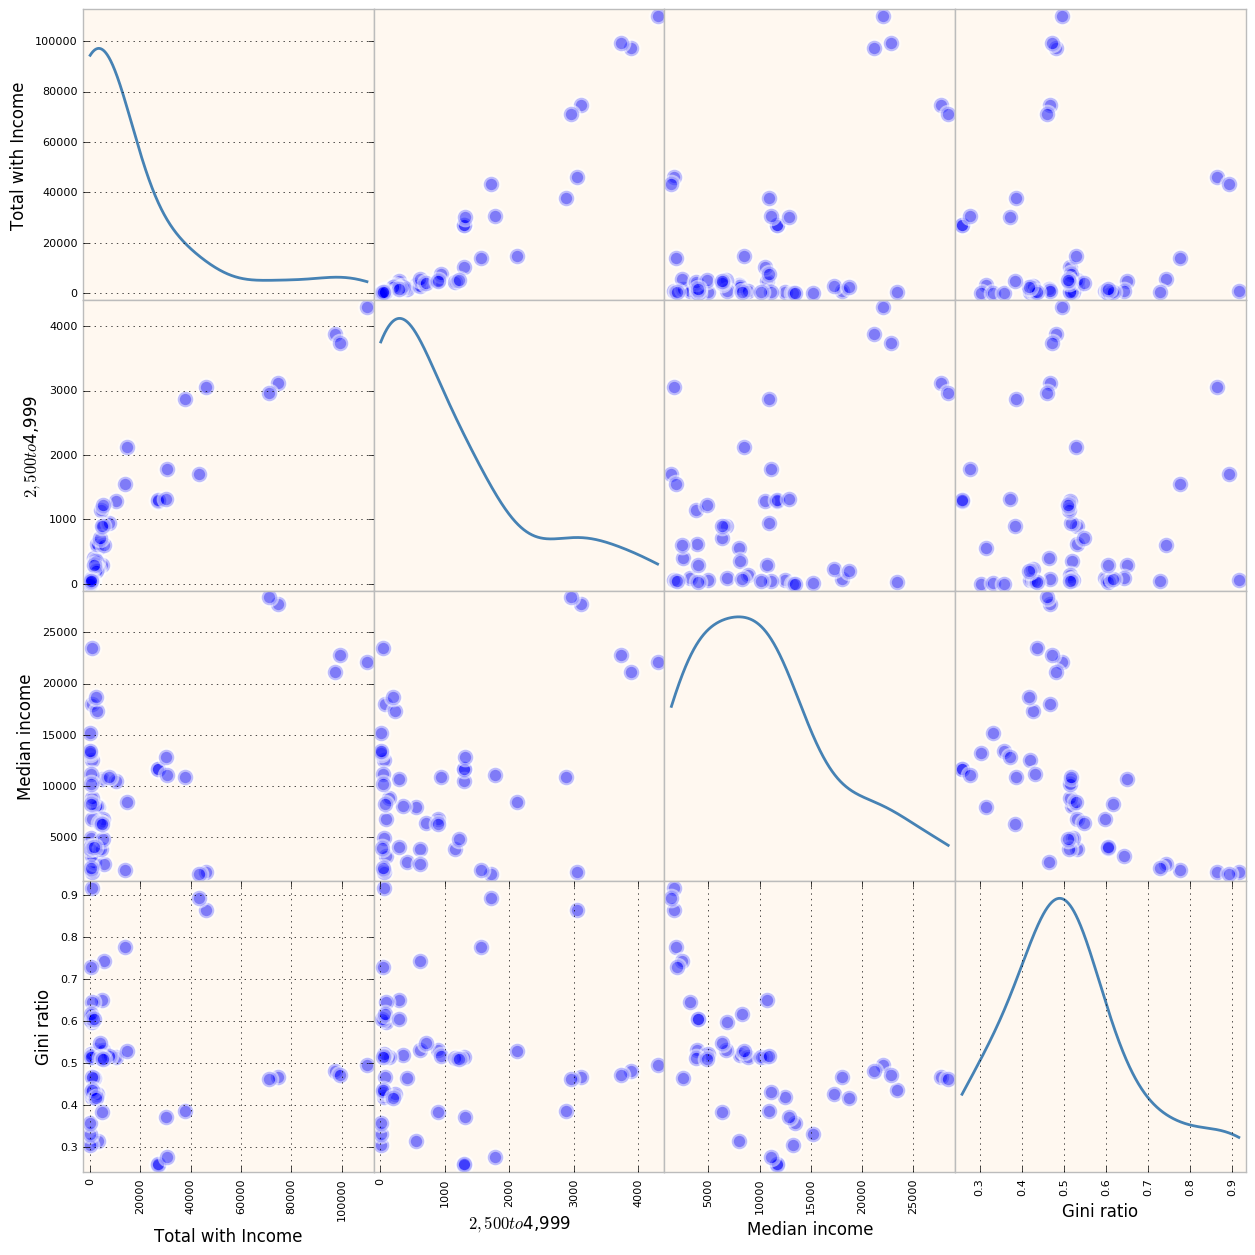

In [179]:
# do the same for all female
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

### Figure 3: Scatter matrix. Each numerical dataframe column is plotted against each other.Plot the dataframe for female.

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

In [180]:
##plotting the Total median incame by race
##pl.scatter...
maleall = allmales['all']['Median income'][1]
malewhite = allmales['white']['Median income'][1]
maleblack = allmales['black']['Median income'][1]
maleasian = allmales['asian']['Median income'][1]
malehis = allmales['hispanic']['Median income'][1]

femaleall = allfemales['all']['Median income'][1]
femalewhite = allfemales['white']['Median income'][1]
femaleblack = allfemales['black']['Median income'][1]
femaleasian = allfemales['asian']['Median income'][1]
femalehis = allfemales['hispanic']['Median income'][1]


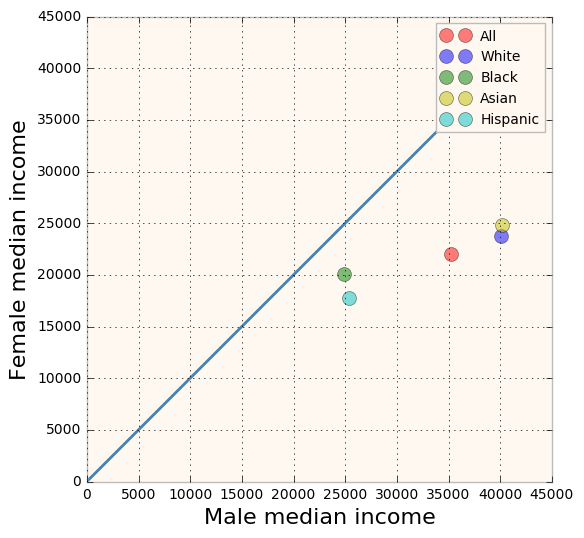

In [181]:
lx = np.arange(0,45000,1000)
ly = lx

pl.figure(figsize = (6,6))
pl.plot(maleall, femaleall, 'or', markersize = 10, alpha = 0.5, label = 'All')
pl.plot(malewhite, femalewhite, 'ob', markersize = 10, alpha = 0.5, label = 'White')
pl.plot(maleblack, femaleblack, 'og', markersize = 10, alpha = 0.5, label = 'Black')
pl.plot(maleasian, femaleasian, 'oy', markersize = 10, alpha = 0.5, label = 'Asian')
pl.plot(malehis, femalehis, 'oc', markersize = 10, alpha = 0.5, label = 'Hispanic')
pl.plot(lx,ly)
pl.xlabel('Male median income', fontsize = 16)
pl.ylabel('Female median income', fontsize = 16)
pl.xlim(0,45000)
pl.ylim(0,45000)
plt.legend()

### Figure 4: Plot the median income of American females is plotted against median income of males for 4 ethnic groups. And plot the 1-1 line which shows men's income are always higher than women's.

# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

Steps to use numpy (and you do not have to!) you can for example use 

pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')!



You need an initial guess for the parameters, where you start searching. It has to be a single variable, so for 2 parameters (a and b for a line) you need to make make a list (or array or tuple) of 2 elements. The numbers inside do not have to be 0 and 1 like I have below - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

then run: 

result = minimize(residuals, p0, args=(all_males, all_females))

in args I put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

In [182]:
from scipy.optimize import minimize
def line(x, pars):
    y = pars[0] * x + pars[1] 
    return y

def residuals(pars, data, model, error=None):
    residuals = (line(data, pars) - model)**2
    if error:
        residuals = residuals / error**2
    return  residuals.sum()  

p0 = [0.5,1000]
result = minimize(residuals, p0, args=(all_males/1e4, all_females/1e4))
result

      fun: 0.2053162641508267
 hess_inv: array([[ 0.04360532, -0.12047337],
       [-0.12047337,  0.41617872]])
      jac: array([ -2.74367630e-06,  -1.62050128e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([ 0.59384338,  0.1674696 ])

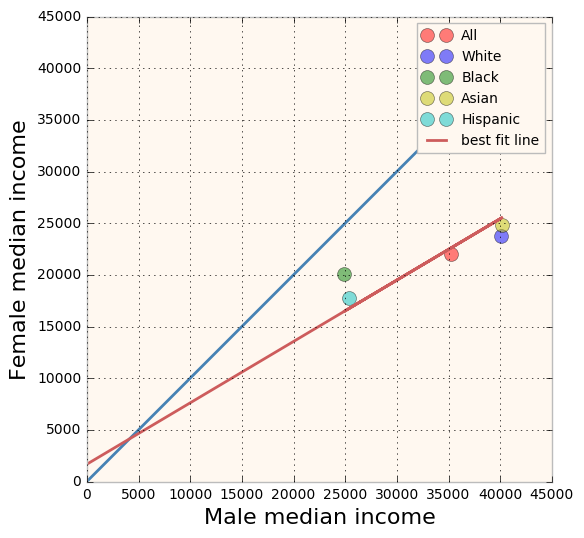

In [183]:
lx = np.arange(0,45000,1000)
ly = lx

pl.figure(figsize = (6,6))
pl.plot(maleall, femaleall, 'or', markersize = 10, alpha = 0.5, label = 'All')
pl.plot(malewhite, femalewhite, 'ob', markersize = 10, alpha = 0.5, label = 'White')
pl.plot(maleblack, femaleblack, 'og', markersize = 10, alpha = 0.5, label = 'Black')
pl.plot(maleasian, femaleasian, 'oy', markersize = 10, alpha = 0.5, label = 'Asian')
pl.plot(malehis, femalehis, 'oc', markersize = 10, alpha = 0.5, label = 'Hispanic')
pl.plot(lx,ly)
pl.plot(all_males, all_males * result.x[0] + result.x[1] * 1e4, label="best fit line")
pl.xlabel('Male median income', fontsize = 16)
pl.ylabel('Female median income', fontsize = 16)
pl.xlim(0,45000)
pl.ylim(0,45000)
plt.legend()

### Figure 5: Plot the median income of American females is plotted against median income of males for 4 ethnic groups. The red line performs residual minimization fit.

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


In [184]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.360976045471, 0.5739482903542108)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

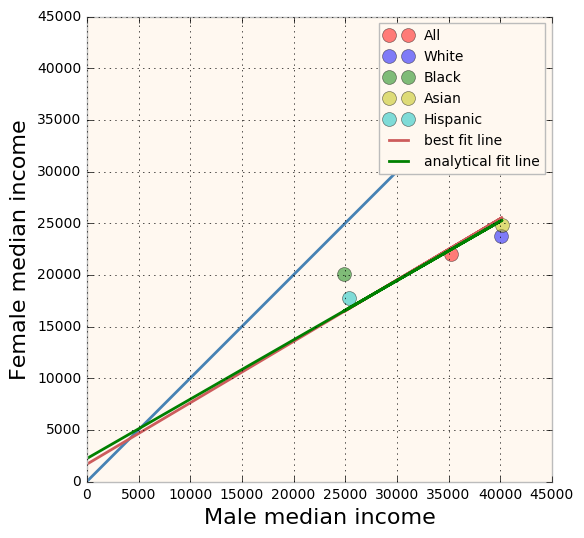

In [185]:
lx = np.arange(0,45000,1000)
ly = lx

pl.figure(figsize = (6,6))
pl.plot(maleall, femaleall, 'or', markersize = 10, alpha = 0.5, label = 'All')
pl.plot(malewhite, femalewhite, 'ob', markersize = 10, alpha = 0.5, label = 'White')
pl.plot(maleblack, femaleblack, 'og', markersize = 10, alpha = 0.5, label = 'Black')
pl.plot(maleasian, femaleasian, 'oy', markersize = 10, alpha = 0.5, label = 'Asian')
pl.plot(malehis, femalehis, 'oc', markersize = 10, alpha = 0.5, label = 'Hispanic')
pl.plot(lx,ly)
pl.plot(all_males, all_males * result.x[0] + result.x[1] * 1e4, label="best fit line")
pl.plot(all_males, all_males * beta1 + beta0, label="analytical fit line")
pl.xlabel('Male median income', fontsize = 16)
pl.ylabel('Female median income', fontsize = 16)
pl.xlim(0,45000)
pl.ylim(0,45000)
plt.legend()

### Figure 6: Plot the median income of American females is plotted against median income of males for 4 ethnic groups. Plot the best fit line as well as the analytical solution fit.

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

In [186]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

In [189]:
all_females_allincomes

array([    nan,  22063.,  27736.,  28402.,  10732.,   1635.,  11686.,
         7950.,   2569.,  12501.,   8067.,   8832.,   3854.,   3210.,
         1611.,   1406.,   1864.,   2428.,  10489.,   6769.,  18035.,
        11138.,  17295.,  13271.,   4974.,  10183.,   6800.,  10918.,
         6368.,  23451.,  15194.,  18687.,  13418.,   3965.,   8242.,
         3849.,   4878.,   4030.,   1991.,     nan,  21159.,  22794.,
        11702.,  12870.,  10908.,   6321.,  11110.,   8438.,     nan,
           nan,  23780.,  30626.,  30919.,  10328.,   1645.,  12038.,
         7812.,   2205.,  12827.,   8195.,   9496.,   4005.,   3407.,
         1650.,   1420.,   1899.,   2491.,  10286.,   6441.,  17934.,
        10843.,  17748.,  13366.,   4648.,  10013.,   6732.,  10426.,
         5921.,  23354.,  14612.,  18777.,  13563.,   3522.,   8011.,
         4255.,   4885.,   4512.,   1938.,     nan,  21500.,  23998.,
        12055.,  13451.,  11848.,   6517.,  11755.,   8927.,     nan,
           nan,  200

In [190]:
# fit and plot...
# is the line fit similar to the one with only the median income? 
# can you find any high legverage points?
p0 = result.x
result_all = minimize(residuals, p0, args=(all_males_allincomes[mask]/1e4, 
                                       all_females_allincomes[mask]/1e4))
result_all

      fun: 14.497930086075936
 hess_inv: array([[ 0.0020943 , -0.00313219],
       [-0.00313219,  0.00749342]])
      jac: array([  0.00000000e+00,  -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.60902051,  0.14930395])

In [193]:
import statsmodels.api as sm
lmallincome = sm.OLS(all_females_allincomes[mask], 
                          all_males_allincomes[mask],
                          hasconst=False).fit()
lmallpar = lmallincome.params

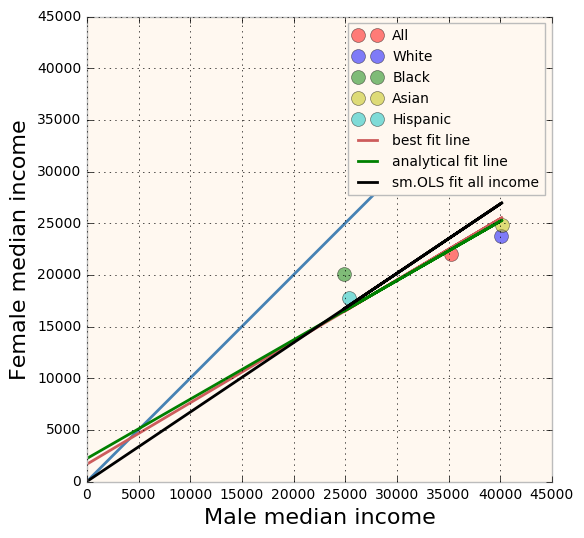

In [194]:
lx = np.arange(0,45000,1000)
ly = lx

pl.figure(figsize = (6,6))
pl.plot(maleall, femaleall, 'or', markersize = 10, alpha = 0.5, label = 'All')
pl.plot(malewhite, femalewhite, 'ob', markersize = 10, alpha = 0.5, label = 'White')
pl.plot(maleblack, femaleblack, 'og', markersize = 10, alpha = 0.5, label = 'Black')
pl.plot(maleasian, femaleasian, 'oy', markersize = 10, alpha = 0.5, label = 'Asian')
pl.plot(malehis, femalehis, 'oc', markersize = 10, alpha = 0.5, label = 'Hispanic')
pl.plot(lx,ly)
pl.plot(all_males, all_males * result.x[0] + result.x[1] * 1e4, label="best fit line")
pl.plot(all_males, all_males * beta1 + beta0, label="analytical fit line")
pl.plot(all_males, all_males * lmallpar , 'k-', label="sm.OLS fit all income")
pl.xlabel('Male median income', fontsize = 16)
pl.ylabel('Female median income', fontsize = 16)
pl.xlim(0,45000)
pl.ylim(0,45000)
plt.legend()

### Figure 7: Figure 6: Plot the median income of American females is plotted against median income of males for 4 ethnic groups. Plot the best fit line as well as the analytical solution fit. The black line is the fit for all income.

# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



In [199]:
stipend = 100000
stipendm = result.x[0] * stipend +  result.x[1] * 10000
print ('what a woman in position where a man receives 10000 stipend would make %d' %stipendm)

what a woman in position where a man receives 10000 stipend would make 61059


# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

We could analyze the gender inequality for all races within one source of income.